    Author: Aaron Strangfeld 
    Date:   26.04.2019

# Introduction

Welcome to this tutorial about _Matrices and Arrays in Computational Physics_. During our studies there has been one thing that appeared rather confusing to us. It was one of those problems that you might recognize pretty late as being one. In our experience these often have more to do with semantics than equations. The title suggests that there are two things we want to discuss: Matrices and Arrays.

We hope that after going through this notebook you will appreciate how useful it is to strictly distinguish between those two words in computational physics. We don't want to go into mathematical details too much. Don't get us wrong. If your not familiar with matrices, their properties and the relevant operations, you should definitely catch up on this. However, our goal is more like giving you an intuition and saving you from wasting your time because of beeing unaware of a basic distinction. But first things first: why do we need those two constructs anyway?

# Why do we need Arrays?

To answer the question above, we need to remember the limitations of digital computing. Digital information is always value-discrete and the realization of the mathematical continuum is not possible in this framework. However, you know that we can approximate continuum relationships by discrete sets of values. We call these sets _arrays_. Their only purpose is to store selected discrete sets of numbers (or objects in general). Let us give an easy example by the following set:

\begin{equation}
[x] = [0,1,2,...,8,9]
\end{equation}

Let's act like we were the most naive programmers on earth and thereby being quite close to what your processor does. We would set this up by the following:

In [1]:
x0 = 0; x1 = 1; x2 = 2; x3 = 3; x4 = 4; x5 = 5; x6 = 6; x7 = 7; x8 = 8; x9 = 9
print(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9)

0 1 2 3 4 5 6 7 8 9


and define a variable for each value we are interested in. Let's assume we want to go a step further and apply a function on each value:

\begin{equation}
f(x)=x^2
\end{equation}

This function is quite simple and still, take a look at the corresponding code for the 10 values:

In [2]:
fx0 = x0**2; fx1 = x1**2; fx2 = x2**2; fx3 = x3**2; fx4 = x4**2; fx5 = x5**2;
fx6 = x6**2; fx7 = x7**2; fx8 = x8**2; fx9 = x9**2
print(fx0,fx1,fx2,fx3,fx4,fx5,fx6,fx7,fx8,fx9)

0 1 4 9 16 25 36 49 64 81


It was horribly annoying to type this piece of code. Essentially, we are doing the same over and over again. This sounds like we should use a for-loop in some way and it is also one of the reasons people introduced the list-object. We define the set $[x]$ directly as a list of numbers:

In [3]:
x = [0,1,2,3,4,5,6,7,8,9]

# or 
x = list(range(0,10))
print(x, type(x))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] <class 'list'>


It's obvious that we will want to do the same for the set of results of $f(x)$. We construct an empty list and iteratively append it by the results of each element in $[x]$:

In [4]:
fx = []
for k in range(len(x)):
    fx.append(x[k]**2)

# or in the more pythonic way
fx = [k**2 for k in x]
print(fx, type(fx))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81] <class 'list'>


This looks much better. Still, we can improve the way we operate with a set of numbers. We can use arrays. The package NumPy for Python will serve us with these objects:

In [5]:
import numpy as np
x = np.arange(0,10)
print(x, type(x))

[0 1 2 3 4 5 6 7 8 9] <class 'numpy.ndarray'>


So far so good. It looks the same as the list-object, but see how we can apply functions directly on the whole object:

In [6]:
fx = x**2
print(fx, type(fx))

[ 0  1  4  9 16 25 36 49 64 81] <class 'numpy.ndarray'>


The result of applying a function on an array is just another array. Note the essence of these objects. We could calculate $f(x)$ for each number of interest $x$ one after the other as we did first. Lists are more powerful but are not as handy because of the for loops. Arrays are the most flexible objects for handling many numbers at the same time. A short answer to the question above could be: We need arrays for operations and storage of many numbers in our code most compactly.

# Why do we need Matrices?

Let's have a look at the following partial differential equation:

\begin{equation}
\partial_ty(x,t)=a \partial_x y(x,t)
\end{equation}

(Note that already at the beginning the subject differs significantly from the section above.) We will do something really important for the upcoming steps. We decide to analyse this equation _mathematically_ using linear algebra. We do so as it enables us to use all the powerful properties and relations that this field encompasses. During your studies of computational physics you will learn how this approach allows you to analyse stability of algorithms, transform them into computational cheaper versions or even come up with new ones.

We first find that the equation above can be interpreted as:

\begin{equation}
\partial_ty(x,t)=\hat{A}y(x,t)
\end{equation}
where $\hat{A}$ is an operator. In our example $\hat{A}=a\partial_x$, but obviously it can be any operator acting on the spacial coordinate of $y(x,t)$. Operators are fine, but we need something discrete to use the expression numerically. What is the discrete version of a general operator? It's a matrix! Here they come up. Along with this discretization we will need to discretize the function $y(x,t)$ to a vector with elements $y_k(t)=y(k\Delta x,t)$. We will write $y$ for $y(t)$ in the following:
\begin{equation}
\vec{y}=\begin{pmatrix}
 y_0 \\ y_1 \\ y_2 \\.\\.\\.\\y_{N-1}
\end{pmatrix}
\end{equation}

assuming $N$ discrete points in space. Here, you can also see the reason why we use this approach on the spacial part of the equation. To use this vector practically, we need to know its entries. Most of the times we know the initial conditions of a system at $t=0$. We have an anchor to define $\vec{y}$ as this initial condition. Later we will see that from there we can evolve the vector in time. Using the time related operator as a starting point would mean the following. We would need to know the behaviour of the system at one point in space for all times. We could solve the system like this, but rarely face such problems in real life. That's why we will go further with the spacial operator approach.

The exact form of the matrix we want to derive depends on the discretization scheme. In our example we could take:

\begin{equation}
\hat{A}y=a\partial_xy \rightarrow \left[A\vec{y}\right]_k=a\frac{y_k-y_{k-1}}{\Delta x}
\end{equation}

From this mapping we can derive the matrix. Remember the definition of matrix-vector multiplication:

\begin{equation}
\left[A\vec{y}\right]_k=\sum_{j}A_{kj}y_j
\end{equation}

You will find that the matrix is of the following shape:
\begin{equation}
A\vec{y}=a\frac{1}{\Delta x}\begin{pmatrix}
1  & 0 & .  & .  &. & 0& -1 \\
-1 & 1 & 0 & .  &. &. &   0   \\
 .  &-1 & 1 & 0 & & &      \\
 .  & .  &.   & . &. & &    \\
 .  & .  &   &.   &.&. & \\
 0  & .  &   &   &. &. &0    \\  
 0  & 0  &   &   & &-1& 1  \\ 
\end{pmatrix}\begin{pmatrix}
 y_0 \\ y_1 \\ y_2 \\.\\.\\.\\y_{N-1}
\end{pmatrix}
\end{equation}

Silently, we introduced periodic boundary conditions for the solved differential equation by setting $y_{-1}=y_{N-1}$. Feel free to pause and ponder on this. 

If we had decided for another scheme like:

\begin{equation}
\hat{A}y=a\partial_xy \rightarrow \left[A\vec{y}\right]_k=a\frac{y_{k+1}-y_{k-1}}{2\Delta x}
\end{equation}

the matrix would also differ:

This time you will find that it is of the following shape:
\begin{equation}
A\vec{y}=a\frac{1}{2\Delta x}\begin{pmatrix}
0  & 1 & .  & .  &. & 0& -1 \\
-1 & 0 & 1 & .  &. &. &   0   \\
 .  &-1 & 0 & 1 & & &      \\
 .  & .  &.   & . &. & &    \\
 .  & .  &   &.   &.&. & \\
 0  & .  &   &   &. &. &1    \\  
 1  & 0  &   &   & &-1& 0  \\ 
\end{pmatrix}\begin{pmatrix}
 y_0 \\ y_1 \\ y_2 \\.\\.\\.\\y_{N-1}
\end{pmatrix}
\end{equation}

Again note the periodic boundary conditions: $y_{N}=y_{0}$. Let's take a last example with another operator:

\begin{equation}
\hat{A}y=a\partial_x^2y \rightarrow \left[A\vec{y}\right]_k=a\frac{y_{k+1}-2y_{k}+y_{k-1}}{\Delta x^2}
\end{equation}

Leading to:

\begin{equation}
A\vec{y}=a\frac{1}{\Delta x^2}\begin{pmatrix}
-2  & 1 & .  & .  &. & 0& 1 \\
1 & -2 & 1 & .  &. &. &   0   \\
 .  & 1 & -2 & 1 & & &      \\
 .  & .  &.   & . &. & &    \\
 .  & .  &   &.   &.&. & \\
 0  & .  &   &   &. &. &1    \\  
 1  & 0  &   &   & &1 & -2  \\ 
\end{pmatrix}\begin{pmatrix}
 y_0 \\ y_1 \\ y_2 \\.\\.\\.\\y_{N-1}
\end{pmatrix}
\end{equation}

This matrix is even symmetric. Let's go back to the discretized differential equation which doesn't depend on $x$ explicitly, anymore:

\begin{equation}
\frac{d}{dt}\vec{y}=A\vec{y}
\end{equation}

We finally want to know where the magic of linear algebra happens. The general solution to a problem like this is:

\begin{equation}
\vec{y}(t) = e^{At}\vec{y}(0)
\end{equation}

This matrix exponential is hard to calculate for non-diagonal matrices. But for diagonal ones we get:

\begin{equation}
y_k(t) = e^{A_{kk}t}y_{k}(0)
\end{equation}

You probably see the issue. We need to diagonalize the matrix. Then, we can solve the problem easily. This is one of the reasons why you should be interested in effective ways of diagonalizing matrices. You will probably go into this rigorousely during your studies and thereby become able to solve partial differential equations like the Schrödinger equation, the heat and diffusion equation, laplace equation or for example the Helmholtz equation with this scheme.

Let's summarize. Matrices can arise from discretizing operators. These occur for example in differential equations. Redefining a time-dependent function that is continuous in space to a time-dependent vector in discretized space allows the application of this matrix instead of the operator. At this point we can use linear algebra to get a effective toolbox at hand to solve the problem.

# Potential Confusions

We hope that there hasn't been any confusions already during the previous sections. Usually the potential tripping hazard is more related to the implementation. There we need to use the mathematical basis we have just investigated and realize it by using arrays, among other things. To get a feeling for this let's start with a simple example, as always. It sounds tough first but we have actually already talked about the one-dimensional diffusion equation and we will solve it numerically. In the last example of the previous section we analysed something of this form:

\begin{equation}
\partial_ty(x,t) = D\partial_x^2y(x,t)
\end{equation}

where $D$ is the diffusion coefficient (and was called $a$ before). The solution is then:

\begin{equation}
\vec{y}(t) = e^{At}\vec{y}(0)
\end{equation}

We already know the shape of $A$ but we need to define $\Delta x$ and construct the vector $\vec{y}(0)$. We decide to use a gaussian distribution at the beginning: 

\begin{equation}
y(x,0)=e^{-x^2} \rightarrow y_k(0) = e^{-x_k^2}
\end{equation}

This resembles a lot to the problem we discussed in the array-section. For each value of interest $x_k$ we want to calculate the corresponding value $y_k$. Thus, we will define an array with $N$ entries.

In [7]:
import numpy as np
N = 50
x = np.linspace(-3,3,N)
dx = x[1]-x[0]
y0 = np.exp(-x**2)

Note that $dx$ is also defined by the array. Now, we implement the matrix $A$, again as an array.

In [8]:
A = np.zeros([N,N])
D = 1
for k in range(N):
    A[k,k]=-2
    A[k,k-1]=1
    A[k-1,k]=1
A = D/dx**2*A
print(A)

[[-133.38888889   66.69444444    0.         ...    0.
     0.           66.69444444]
 [  66.69444444 -133.38888889   66.69444444 ...    0.
     0.            0.        ]
 [   0.           66.69444444 -133.38888889 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... -133.38888889
    66.69444444    0.        ]
 [   0.            0.            0.         ...   66.69444444
  -133.38888889   66.69444444]
 [  66.69444444    0.            0.         ...    0.
    66.69444444 -133.38888889]]


Pay attention on this. We constructed an array with two dimensions to represent the matrix. Obviousely one-dimensional arrays are like vectors and two-dimensional ones correspond to matrices, right? No! We will see that the shape of the array doesn't have to do anything with the mathematical meaning of the object. Arrays are just a useful tool to handle numbers. We could even come up with some scheme to rearrange the entries of the array to a one-dimensional one of length $N^2$. Still, we would call it a matrix as we will use it as one, mathematically. In our case the important definition is the way how the operation of matrix-vector multiplication works. We need to implement this operation in the right way. The one-dimensional representation of the matrix would just require a different type of bookkeeping to preserve matrix-vector multiplication. It's tempting to represent the vector as an one-dimensional array while using two-dimensional ones for matrices and in this case this is also the smartest way to do it. Keep in mind this difference. The matrices and vectors we are talking about are mathematical objects. The way we store numbers in the code is independent of these objects. What is not independent is the way we execute operations with this numbers as it has to be related to the mathematical meaning. Let's continue and come to this later to see when we can't do it the easy way, anymore.

The last step in the algorithm is to apply the exponential of the matrix times the time on the initial vector. This isn't by far the best way to do it from the performance point of view but we will stick to it for simplicity. Play around with parameter t if you want:

<IPython.core.display.Javascript object>


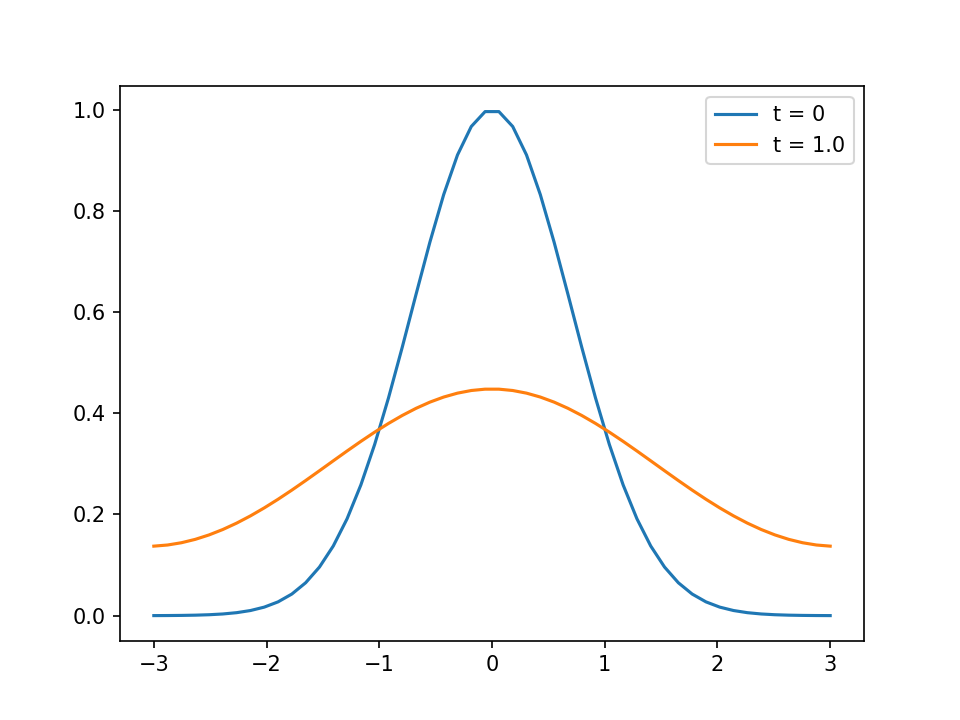

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.linalg import expm
t = 1
yt = expm(A*t) @ y0

# Quick Plotting
plt.plot(x,y0, label = "t = 0")
plt.plot(x,yt, label = "t = %0.1f" %t)
plt.legend()
plt.show()

We imported the function expm from scipy.linalg to execute an approximation to the matrix exponential. By using predefined functions of some library we need to take care how the operations we expect them to do are implemented. How are arrays interpreted in this function? In this case it was important to know that expm takes the matrix as a two-dimensional array. Otherwise, we would have had to reshape it accordingly. The \@-sign is the command for matrix-vector multiplication and expects to get the matrix a two-dimensional array again and the vector as an one-dimensional one.

Let's summarize: we described the problem mathematically by using matrices and vectors. Then, we implemented the mathematical objects with arrays. However, The meaning of the arrays as vectors and matrices was defined by the operations or functions we applied, not by the arrays themself. By this we became able to solve the equation for any time $t$.

We promised to talk about cases that would require us to be aware of the distinction between mathematical meaning and implementation as code. We don't have to go far for this. We just add another spacial dimension to the problem:
\begin{equation}
y(x,t)\rightarrow y(x_1,x_2,t)
\end{equation}
This problem can be discretized, too:
\begin{equation}
y_{k_1k_2}(t) = y(k_1\Delta x_1, k_2\Delta x_2,t)
\end{equation}
Before, we interpreted the discretized version of the quantity $y$ as a vector, but now there are two indices. Is this a problem? At first sight it seems like one. You might think that $y_{k_1k_2}$ are elements of a matrix now and in fact you could say that. But then again remember what we meant when we were saying that something is a matrix. In this context we used the term to describe a discrete operator which was applied on a vector. On which vector would you apply the "matrix" $y$? There is no useful context for this definition. The way we defined $y_{k_1k_2}$ is just some artifical sorting we introduced with a kind of coordinate system. The sorting of the elements is always connected to building an array, not a new mathematical object like a matrix.

We have already talked about the arbitrariness with which we can store our numbers in an array. We will make use of it to solve the two-dimensional problem in exactly the same way we solved the one-dimensional one.

Let's build the array in the most intuitive way first: as a 2d array with $N_1=N_2=N$ and $\Delta x_1 = \Delta x_2 = \Delta x$:



In [10]:
N=50
x = np.linspace(-3,3,N)
dx = x[1]-x[0]
X1,X2 = np.meshgrid(x,x)
y0 = np.exp(-(X1**2+X2**2))
print(y0)

[[1.52299797e-08 3.12795948e-08 6.23446948e-08 ... 6.23446948e-08
  3.12795948e-08 1.52299797e-08]
 [3.12795948e-08 6.42425708e-08 1.28044608e-07 ... 1.28044608e-07
  6.42425708e-08 3.12795948e-08]
 [6.23446948e-08 1.28044608e-07 2.55211172e-07 ... 2.55211172e-07
  1.28044608e-07 6.23446948e-08]
 ...
 [6.23446948e-08 1.28044608e-07 2.55211172e-07 ... 2.55211172e-07
  1.28044608e-07 6.23446948e-08]
 [3.12795948e-08 6.42425708e-08 1.28044608e-07 ... 1.28044608e-07
  6.42425708e-08 3.12795948e-08]
 [1.52299797e-08 3.12795948e-08 6.23446948e-08 ... 6.23446948e-08
  3.12795948e-08 1.52299797e-08]]


We would like to use matrix-vector multiplication as it is implemented by the @-symbol.Therefore, we need to represent the vector as an one-dimensional array. The numpy-function "ravel" ([Documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html)) does this for us. It rearranges the elements according to the following scheme:

\begin{equation}
k=k_2+Nk_1 \qquad y_k(t)=y_{k_1,k_2}(t)
\end{equation}

This does simply mean that the rearranged $y$ starts with the first row ($k_1=0$) and appends each subsequent one behind. Make sure that you see why in this case the relation for $k$ has to be exactly like this. We do a quick check of this by calculating the maximum value of $k$ which should be $N^2-1$. Setting $k_1 = N-1$ and $k_2=N-1$ we get $k=N-1+N(N-1)=N^2-1$. The relation looks more complicated than it is. Keep in mind that this is probably the simplest method to rearrange a two-dimensional array to a one-dimensional one. It is called the lexicographical ordering.

In [11]:
y0_rearranged=np.ravel(y0)
print(y0_rearranged)

[1.52299797e-08 3.12795948e-08 6.23446948e-08 ... 6.23446948e-08
 3.12795948e-08 1.52299797e-08]


Before we had N elements in the vector. This led to an NxN matrix. If you scroll up again you can see that most of the entries of the matrix were zeros. To be exact: $N^2-3N$. Such matrices are called sparse matrices. In matrix-vector multiplication these zeros stand for operations that don't do anything. Usually we want to avoid those. In two dimensions it becomes more extreme. The matrix we want to apply on the newly introduced vector is of shape $N^2$x$N^2$. There are $N^4$ entries with $N^4-3N^2$ zeros. In other words there are only $3/N^2$ useful operations. You will see that the following calculations will take much longer than for one dimension and we will show what one will do in practice, instead. First let us build the matrix. We need a matrix that represents the following:

\begin{equation}
\left[A\vec{y}\right]_{k_1,k_2}=D\left[\frac{y_{k_1+1,k_2}-2y_{k_1,k_2}+y_{k_1-1,k_2}}{\Delta x^2}+\frac{y_{k_1,k_2+1}-2y_{k_1,k_2}+y_{k_1,k_2-1}}{\Delta x^2}\right]
\end{equation}

To identify with the index $k$ we write:

\begin{equation}
\left[A\vec{y}\right]_k=\frac{D}{\Delta x^2}\left[y_{k+N}-2y_{k}+y_{k-N}+y_{k+1}-2y_{k}+y_{k-1}\right]
\end{equation}

From this we derive the content of the matrix and build an $N^2$x$N^2$ two dimensional array. Remember that we need to do it this way as we want to use expm and it expects to get a 2d-array representing a matrix.

In [12]:
A = np.zeros([N**2,N**2])
for k in range(N**2):
    A[k,k]=-4
    A[k,k-1]=1
    A[k-1,k]=1
    A[k-N,k]=1
    A[k,k-N]=1
A = D/dx**2*A

Now we evolve in time like in the one-dimensional case. Essentially, we are doing nothing else than solving a more complicated one-dimensional problem with the same method. It is just given in a way that after reshaping the vector into the original two-dimensional format it corresponds to the solution of the diffusion equation in two dimensions.

In [13]:
t = 0.1
yt_rearranged = expm(A*t)@y0_rearranged
yt = np.reshape(yt_rearranged,np.shape(y0))

Have a look at the plot. The blue wireframe represents the intial state. The red one is representing the state after time t.

<IPython.core.display.Javascript object>


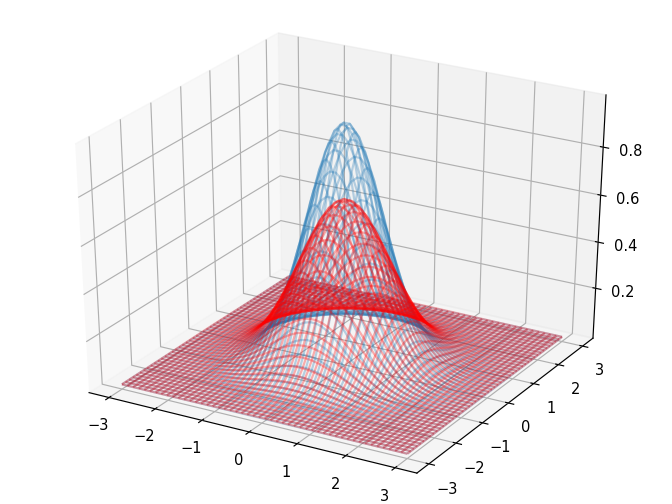

In [18]:
# Quick Plotting
%matplotlib notebook
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(dpi=70)
ax = p3.Axes3D(fig)  
ax.plot_wireframe(X1, X2, y0, alpha = 0.3)
ax.plot_wireframe(X1, X2, yt, color = "red", alpha = 0.3)
plt.show()

Let's give a short summary of what we have encountered during this chapter. From linear algebra we know that we can apply matrices on vectors. One way of solving partial differential equation guides us towards using this. For one-dimensional problems we can easily take the way of implementing the matrix as a 2d-array while we implement the vector as a 1d-array. In two dimensions this approach gets more complicated. We would like to represent the coordinates of the system as a 2d-array. By doing so, we can't implement the matrix as 2d-array anymore. At this point we noticed that this doesn't mean that there isn't a way to represent the operator as a matrix. We just need to adjust our implementation to get back to the comfortable way of representing the mathematical objects. We rearranged the 2d-array of coordinates to a 1d-array representing the vector again. After this we could construct a 2d-array accordingly to represent the matrix in the common way. We solved the problem in this representation. Actually, we would have finished our task by then, but we wanted to visualize the result. As the plotting tool expects data in the way we defined the coordinates at the beginning, we needed to reshape the solution to a 2d-array. That's it. This scheme can be even extended to an arbitrary number of dimensions, making a code much more flexible.

If you think that this sounds cumbersome, you have the right feeling. For one dimension this is a useful method. From two dimensions upwards you don't want to use it anymore as the fraction of useful operations shrinks especially for high numbers of grid points. However, we hope that it was useful to have a look at these problems to see how one can juggle with arrays and matrices by keeping in mind which role they play in this matter.

We want to answer a final question. If we shouldn't solve the equation in two dimensions with the exponential of a matrix, what would we do instead? We will introduce time steps $\Delta t$.

We can approximate the exponential in the following way:

\begin{equation}
e^{A\Delta t}= I+A\Delta t+O(\Delta t^2)
\end{equation}

where $I$ is the identity matrix. We got rid of the exponential but there are still matrices and therefore many zeros in our case. If we don't like that the matrix-vector multiplication does execute the multiplications with zeros, we can simply define our custom matrix-vector multiplication taking only the non-zero terms into account. Again we start by defining the intitial state of the system as a 2d-array.

In [15]:
N=50
x = np.linspace(-3,3,N)
dx = x[1]-x[0]
X1,X2 = np.meshgrid(x,x)
y0 = np.exp(-(X1**2+X2**2))

Using the approximation we get:

\begin{equation}
\vec{y}(\Delta t)=\left[I+A\Delta t\right]\vec{y}(0)
\end{equation}

In this form we can address each element $y_{k_1,k_2}$ individually:

\begin{equation}
y_{k_1,k_2}(\Delta t)=y_{k_1,k_2}(0)+\Delta t\left[A\vec{y}(0)\right]_{k_1,k_2}=y_{k_1,k_2}(0)+\frac{D\Delta t}{\Delta x^2}\left[y_{k_1+1,k_2}-2y_{k_1,k_2}+y_{k_1-1,k_2}+y_{k_1,k_2+1}-2y_{k_1,k_2}+y_{k_1,k_2-1}\right]
\end{equation}

This way we don't need any reshaping or similiar methods and simply use two for loops for one time step:

In [16]:
y=y0
yt = np.zeros_like(y)
dt = 0.001
Nt = 100 # number of time steps
for k_t in range(Nt):
    for k1 in range(N):
        for k2 in range(N):
            yt[k1,k2]=y[k1,k2]+D*dt/dx**2*(y[(k1+1)%N,k2]-4*y[k1,k2]+y[k1-1,k2]+y[k1,(k2+1)%N]+y[k1,k2-1])
    y=yt

<IPython.core.display.Javascript object>


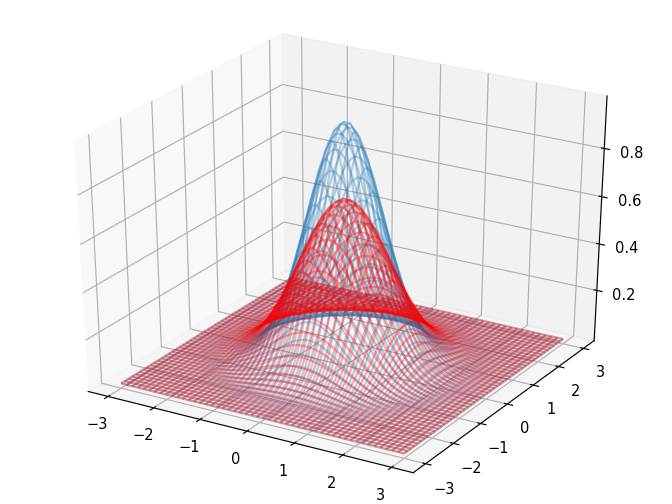

In [19]:
%matplotlib notebook
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(dpi=70)
ax = p3.Axes3D(fig)  
ax.plot_wireframe(X1, X2, y0, alpha = 0.3)
ax.plot_wireframe(X1, X2, yt, color = "red", alpha = 0.3)
plt.show()

This approach has many subtleties (e.g. instabilities, computation time depends on number of time steps and so on) but if we need only a few time steps this one is much more efficient. We see how powerful the matrix approach can be. We don't always need to implement it directly. Instead, we can use it to derive other methods to solve differential equations. For example we see that we could extend the approximation of the exponential to the second order. We would calculate $A^2$ once and then again execute a custom matrix-vector multiplications for all non-zero elements and so on. Keep in mind that even if most of the times you will encounter direct implementation of the matrices in one-dimensional problems only, the general approach will be useful in a lot of situations.